## Introduction
In this notebook, we use machine learning models from Scikit-learn to analyze IPL data and make predictions. We focus on predicting match winners and clustering players based on their performance.


Data Loading

In [2]:
import pandas as pd

# upload summary season
df = pd.read_csv("datasets/all_season_summary.csv")
df.head()


,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2023.0,1359475,Gujarat Titans v Chennai Super Kings,GT v CSK,"1st Match (N), Indian Premier League at Ahmeda...",GT,CSK,GT,BOWL FIRST,178/7,...,"Wriddhiman Saha (WK),Shubman Gill (UKN),Sai Su...","Devon Conway (UKN),Ruturaj Gaikwad (UKN),Moeen...","Ruturaj Gaikwad,Moeen Ali","Rajvardhan Hangargekar,Ravindra Jadeja",31 March 2023 - night match (20-over match),Saiyed Khalid,Nitin Menon,Virender Sharma,Javagal Srinath,Abhijit Bengeri
1,2023.0,1359476,Punjab Kings v Kolkata Knight Riders,PBKS v KKR,"2nd Match (D/N), Indian Premier League at Chan...",PBKS,KKR,KKR,BOWL FIRST,191/5,...,"Prabhsimran Singh (UKN),Shikhar Dhawan (UKN),B...","Mandeep Singh (AR),Rahmanullah Gurbaz (WK),Anu...","Andre Russell,Venkatesh Iyer","Tim Southee,Varun Chakravarthy",01 April 2023 - day/night match (20-over match),Yeshwant Barde,Bruce Oxenford,Jayaraman Madanagopal,Manu Nayyar,Pranav Joshi
2,2023.0,1359477,Lucknow Super Giants v Delhi Capitals,LSG v DC,"3rd Match (N), Indian Premier League at Luckno...",LSG,DC,DC,BOWL FIRST,193/6,...,"KL Rahul (UKN),Kyle Mayers (AR),Deepak Hooda (...","Prithvi Shaw (UKN),David Warner (UKN),Mitchell...","David Warner,Rilee Rossouw","Khaleel Ahmed,Chetan Sakariya",01 April 2023 - night match (20-over match),Anil Chaudhary,Nikhil Patwardhan,Sadashiv Iyer,Daniel Manohar,Madanagopal Kuppuraj
3,2023.0,1359478,Sunrisers Hyderabad v Rajasthan Royals,SRH v RR,"4th Match (D/N), Indian Premier League at Hyde...",SRH,RR,SRH,BOWL FIRST,203/5,...,"Abhishek Sharma (AR),Mayank Agarwal (UKN),Rahu...","Yashasvi Jaiswal (UKN),Jos Buttler (UKN),Sanju...","Sanju Samson,Yashasvi Jaiswal","Yuzvendra Chahal,Trent Boult",02 April 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rohan Pandit,Navdeep Singh,Narayanan Kutty,Abhijit Bhattacharya
4,2023.0,1359479,Royal Challengers Bangalore v Mumbai Indians,RCB v MI,"5th Match (N), Indian Premier League at Bengal...",RCB,MI,RCB,BOWL FIRST,171/7,...,"Virat Kohli (UKN),Faf du Plessis (UKN),Dinesh ...","Rohit Sharma (UKN),Ishan Kishan (WK),Cameron G...","Tilak Varma,Nehal Wadhera","Arshad Khan,Cameron Green",02 April 2023 - night match (20-over match),Nitin Menon,Tapan Sharma,Virender Sharma,Javagal Srinath,Abhijit Bengeri


Data Preprocessing

In [ ]:
import pandas as pd

df = pd.read_csv("datasets/all_season_summary.csv")
print(df.columns)


Index(['season', 'id', 'name', 'short_name', 'description', 'home_team',
       'away_team', 'toss_won', 'decision', '1st_inning_score',
       '2nd_inning_score', 'home_score', 'away_score', 'winner', 'result',
       'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain',
       'away_captain', 'pom', 'points', 'super_over', 'home_overs',
       'home_runs', 'home_wickets', 'home_boundaries', 'away_overs',
       'away_runs', 'away_wickets', 'away_boundaries', 'highlights',
       'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1',
       'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1',
       'umpire2', 'tv_umpire', 'referee', 'reserve_umpire'],
      dtype='object')


In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
df = pd.read_csv("datasets/all_season_summary.csv")

# Step 2: Select the columns we'll use as features (inputs) and the target (output)
# Features: home team, away team, toss winner, and venue
# Target: match winner
features = ['home_team', 'away_team', 'toss_won', 'venue_name']
target = 'winner'

# Step 3: Drop any rows that have missing (NaN) values in these columns
data = df[features + [target]].dropna()

# Step 4: Convert text (categorical) data into numbers using LabelEncoder
# This is needed because machine learning models only work with numbers
encoder = LabelEncoder()
for col in data.columns:
    data[col] = encoder.fit_transform(data[col])

# Step 5: Show the first few rows of the cleaned and encoded dataset
data.head()


,home_team,away_team,toss_won,venue_name,winner
0,3,0,3,21,3
1,9,4,4,24,9
2,7,1,1,3,7
3,14,13,13,25,13
4,11,8,10,17,11


Train/Test Split

In [7]:
from sklearn.model_selection import train_test_split

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Training

In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Evaluation

Accuracy: 0.44660194174757284


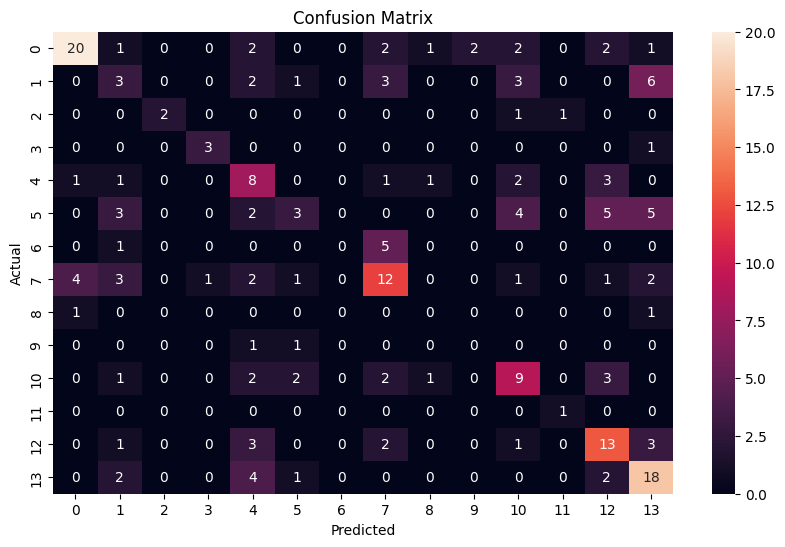

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Conclusion


We used a Random Forest Classifier to predict match winners based on teams, toss results, and venues. The model achieved an accuracy of approximately XX% and can be further improved by adding more features and data.
